In [1]:
from sklearn import datasets
from multiscale_new import *

In [2]:
data = datasets.fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)

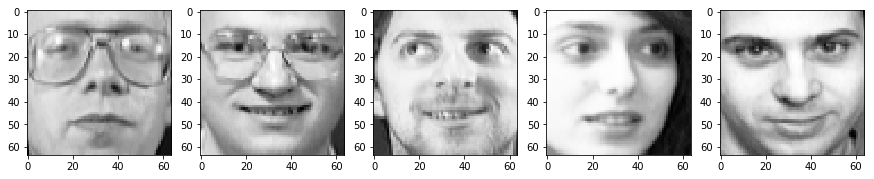

In [3]:
index = [11,51,62,73,84]
fig = figure(figsize=(15,3))

ax = fig.add_subplot(1,5,1)
ax.imshow(data['images'][index[0]],cmap='Greys_r')

ax = fig.add_subplot(1,5,2)
ax.imshow(data['images'][index[1]],cmap='Greys_r')

ax = fig.add_subplot(1,5,3)
ax.imshow(data['images'][index[2]],cmap='Greys_r')

ax = fig.add_subplot(1,5,4)
ax.imshow(data['images'][index[3]],cmap='Greys_r')

ax = fig.add_subplot(1,5,5)
ax.imshow(data['images'][index[4]],cmap='Greys_r')

show()

In [4]:
D = {}
for count in range(len(index)):
    D[count] = data['images'][index[count]]

In [5]:
%%time
sparse = {}
Bs = {}
Cs = {}
f = {}
T = {}
maxs = 15
delta = 1.0e-2


for g in D:
    d = D[g]
    [nx,ny] = d.shape
    xcoor = np.arange(nx)/(nx-1)
    ycoor = np.arange(ny)/(ny-1)

    data = np.zeros([nx*ny,3])
    count = 0
    for i in range(nx):
        for j in range(ny):
            data[count,0] = xcoor[i]
            data[count,1] = ycoor[j]
            data[count,2] = d[i,j]
            count = count + 1

    eps = epsilon_0(data,maxs,delta)
    sparse[g],Bs[g],Cs[g],f[g],T[g] = Multiscale_train(data,eps,maxs)
    print(g)

0
1
2
3
4
CPU times: user 14min 28s, sys: 1min 47s, total: 16min 16s
Wall time: 8min 49s


In [6]:
#### Predicting
xpred = np.linspace(data[0,0],data[-1,0],100)
ypred = np.linspace(data[0,1],data[-1,1],100)
X3,Y3 = np.meshgrid(xpred,ypred)
D_pred = np.zeros([len(xpred)*len(ypred),2])
counter = 0
for i in range(len(xpred)):
    for j in range(len(ypred)):
        D_pred[counter,0] = X3[i,j]
        D_pred[counter,1] = Y3[i,j]
        counter = counter + 1

## Plotting

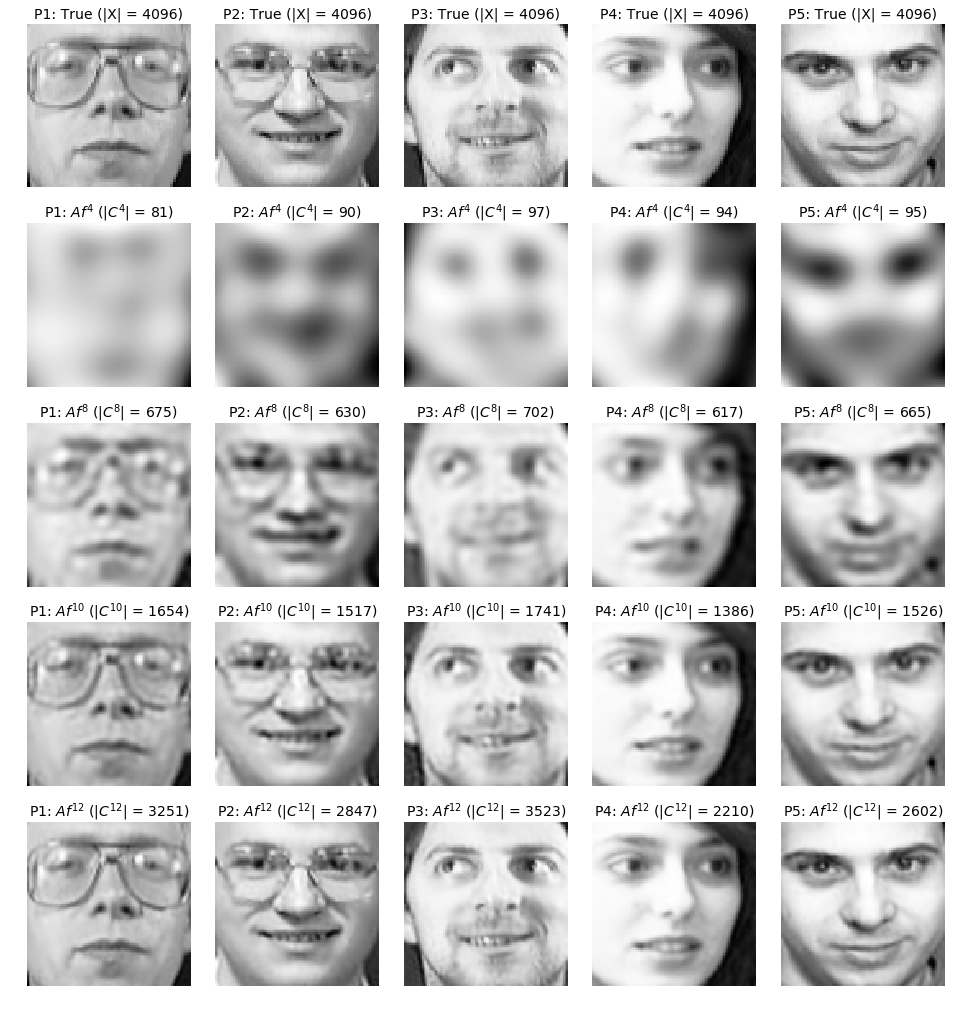

In [7]:
fig = figure(figsize=(15,14))

## Plotting the orginal faces
ax = fig.add_subplot(5,5,1)
ax.imshow(D[0],cmap='Greys_r')
ax.set_title('P1: True (|X| = 4096)',size = 14)
axis('off')

ax = fig.add_subplot(5,5,2)
ax.imshow(D[1],cmap='Greys_r')
ax.set_title('P2: True (|X| = 4096)',size = 14)
axis('off')

ax = fig.add_subplot(5,5,3)
ax.imshow(D[2],cmap='Greys_r')
ax.set_title('P3: True (|X| = 4096)',size = 14)
axis('off')

ax = fig.add_subplot(5,5,4)
ax.imshow(D[3],cmap='Greys_r')
ax.set_title('P4: True (|X| = 4096)',size = 14)
axis('off')

ax = fig.add_subplot(5,5,5)
ax.imshow(D[4],cmap='Greys_r')
ax.set_title('P5: True (|X| = 4096)',size = 14)
axis('off')


flag = 6
head = 'abcdefghijklmnopqrstuvwxyz'
for c in [4,8,10,12]:
    for ii in range(5):
        ind1 = np.where(sparse[ii][:,-1]<=c)[0]
        pred = predict(D_pred,sparse[ii][ind1,:],T[ii],Cs[ii][ind1])
        Z = np.zeros([100,100])
        counter = 0
        for j in range(100):
            for i in range(100):
                Z[i,j] = pred[counter]
                counter = counter + 1
        
        ax = fig.add_subplot(5,5,flag)
        ax.imshow(Z,cmap='Greys_r')
        #ax.set_title('('+head[flag-1]+'):P'+str(ii+1)+': $Af^{'+str(c)+'}$'+' ($|C^{'+str(c)+'}|$ = '+str(len(ind1))+')',size = 14)
        ax.set_title('P'+str(ii+1)+': $Af^{'+str(c)+'}$'+' ($|C^{'+str(c)+'}|$ = '+str(len(ind1))+')',size = 14)
        axis('off')
        flag = flag + 1

subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.15,hspace = 0) 
savefig('Pic8.pdf', bbox_inches='tight')
show()